# 💥🟢Worst cell detection 

#### This analysis is based on VoLTE traffic and VoLTE packet loss(downlink) for 2 consecutive days.
#### We are taking 2 days data for a cell and based on those values we will predict whether the cell has degraded(Worst) or improved(Good) 
#### We will train our model and will test on the sample data set and will then check for its accuracy

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 
import matplotlib.pyplot as plt

### 📊 Reading our excel file , which has total 5 columns
### If Remarks column is 0 --> Degraded or worst cell 
### If Remarks column is 1 --> Good cell(has good performance)



In [70]:
df=pd.read_excel(r'C:\Users\euakumn\OneDrive - Ericsson AB\Desktop\data analysis\Worst_cell_detection_using_ML.xlsx',sheet_name=0)
df

,VoLTE Traffic_Day1,VoLTE Packet Loss DL_Day1,VoLTE Traffic_Day2,VoLTE Packet Loss DL_Day2,Remarks
0,6.54,3.14,5.89,3.70,1
1,15.20,3.65,13.51,3.50,1
2,13.85,3.22,14.50,3.77,1
3,9.76,3.21,11.14,3.21,1
4,8.06,4.38,8.53,5.17,1
...,...,...,...,...,...
7494,5.62,4.25,6.69,3.22,0
7495,9.07,3.02,8.34,3.07,1
7496,6.20,5.21,7.19,5.90,0
7497,7.00,4.00,8.65,3.67,0


In [71]:
df.dtypes

VoLTE Traffic_Day1           float64
VoLTE Packet Loss DL_Day1    float64
VoLTE Traffic_Day2           float64
VoLTE Packet Loss DL_Day2    float64
Remarks                        int64
dtype: object

In [72]:
feature_df =df[['VoLTE Traffic_Day1','VoLTE Packet Loss DL_Day1','VoLTE Traffic_Day2','VoLTE Packet Loss DL_Day2']]
X = np.asarray(feature_df)
X[0:5]

array([[ 6.54,  3.14,  5.89,  3.7 ],
       [15.2 ,  3.65, 13.51,  3.5 ],
       [13.85,  3.22, 14.5 ,  3.77],
       [ 9.76,  3.21, 11.14,  3.21],
       [ 8.06,  4.38,  8.53,  5.17]])

In [73]:
y = np.asarray(df['Remarks'])
y.shape

(7499,)

In [ ]:
#  Defining test and train sample size

In [74]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01,random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7424, 4) (7424,)
Test set: (75, 4) (75,)


In [ ]:
# Using Sklearn to model our requirement. We are using State Vector machine (SVM) technique to model our problem

In [59]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the output based on train and test data

In [76]:
yhat = clf.predict(X_train)
print (yhat)
xhat = clf.predict(X_test)
print (xhat)


[0 1 0 ... 1 0 1]
[0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0]


In [ ]:
# Now we need to check the accuracy of our model

In [77]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, xhat))

Train set Accuracy:  0.8884698275862069
Test set Accuracy:  0.6933333333333334


### ✔✔🧿We are getting accuracy of arround ~0.7 which is a good prediction.

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Ploting confusion matrix to further analyse our Model

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.64      0.80      0.71        35
           1       0.77      0.60      0.68        40

    accuracy                           0.69        75
   macro avg       0.71      0.70      0.69        75
weighted avg       0.71      0.69      0.69        75

Confusion matrix, without normalization
[[28  7]
 [16 24]]


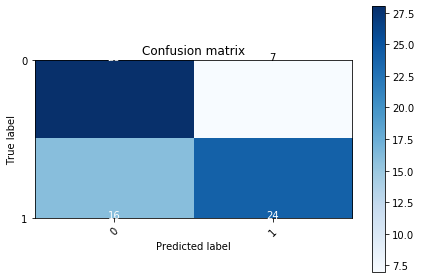

In [64]:
cnf_matrix = confusion_matrix(y_test, xhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, xhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],normalize= False,  title='Confusion matrix')

## Checking the accuracy with other metrices also like F1 score,jaccard_similarity_score

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test, xhat, average='weighted') 

0.6913650680454032

In [67]:
from sklearn.metrics import jaccard_similarity_score
js=jaccard_similarity_score(y_test, xhat)
print(js)

0.6933333333333334


C:\Users\euakumn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


#### 🌈❄⚡ Overall model give a decent amount of accuracy, we can alter the parameters in SVM model and try differnet combination 
#### to achieve more accuracy 